# Lab 2: Norma dan Dekomposisi Eigen

Pada catatan sebelumnya, kita telah membahas tentang konsep norma pada vektor dan matriks, normalisasi vektor, dan dekomposisi eigen. Pada bagian ini , kita akan menggunakan NumPy untuk mempermudah proses komputasinya dan memperkuat pemahaman kita akan konsep - konsep tersebut.

Seperti biasa, sebelum memulai kita harus memastikan bahwa kita menggunakan lingkungan komputasi yang sama: 

In [1]:
import sys
import numpy as np
from numpy import linalg

print('Python: {}'.format(sys.version))
print('NumPy: {}'.format(np.__version__))

Python: 3.8.3 (default, May 19 2020, 18:47:26) 
[GCC 7.3.0]
NumPy: 1.18.1


### Norma vektor dan matriks

Untuk menghitung norma vektor atau matriks, kita hanya cukup menggunakan satu baris perintah dengan fungsi `linalg.norm()`:

In [2]:
# mendefinisikan array
A = np.arange(9) - 3
A

array([-3, -2, -1,  0,  1,  2,  3,  4,  5])

In [3]:
# melakukan reshape membentuk matriks berukuran 3 x 3
B = A.reshape((3,3))
B

array([[-3, -2, -1],
       [ 0,  1,  2],
       [ 3,  4,  5]])

In [4]:
# Perhitungan Norma Euklidesan (L2)
print(np.linalg.norm(A))
print(np.linalg.norm(B))

8.306623862918075
8.306623862918075


In [5]:
# Perhitungan Norma Frobenius (L2 Norm untuk matriks)
print(np.linalg.norm(B, 'fro'))

8.306623862918075


In [6]:
# Perhitungan Norma L1
print(np.linalg.norm(A, 1))
print(np.linalg.norm(B, 1))

21.0
8.0


In [7]:
# Perhitungan norma maks (P = tak hingga)
print(np.linalg.norm(A, np.inf))
print(np.linalg.norm(B, np.inf))

5.0
12.0


### Normalisasi vektor

In [8]:
# normalisasi untuk mendapatkan vektor satuan
norm = np.linalg.norm(A, 2)
sat_A = A / norm

print(sat_A)

[-0.36115756 -0.24077171 -0.12038585  0.          0.12038585  0.24077171
  0.36115756  0.48154341  0.60192927]


In [9]:
# norma dari vektor satuan adalah 1
np.linalg.norm(sat_A)

1.0

### Dekomposisi eigen

Kita dapat menghitung nilai dan vektor eigen dengan sangat mudah dengan menggunakan NumPy. Ingat bahwa vektor eigen dari matriks persegi $\mathbf{A}$ merupakan vektor bukan-nol $\mathbf{v}$, di mana perkalian dengan $\mathbf{A}$ hanya akan mengubah skalanya saja:

$$\mathbf{Av} = \lambda \mathbf{v}$$

Nilai skalar $\lambda$ dikenal sebagai nilai eigen.

In [10]:
# mencari nilai dan vektor eigen untuk matriks persegi sederhana
A = np.diag(np.arange(1,4))
A

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [11]:
nilai_eigen, vektor_eigen = np.linalg.eig(A)
print("Nilai - nilai eigen: {}".format(nilai_eigen))
print("Vektor - vektor eigen: {}".format(vektor_eigen))

Nilai - nilai eigen: [1. 2. 3.]
Vektor - vektor eigen: [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [12]:
# nilai eigen w[i] berkorespondensi pada vektor eigen v[:, i]
print('Nilai eigen: {}'.format(nilai_eigen[1]))
print('Vektor eigen: {}'.format(vektor_eigen[:,1]))

Nilai eigen: 2.0
Vektor eigen: [0. 1. 0.]


Kita dapat dengan mudah melakukan pengecekan kembali pada nilai dan vektor eigen ini dengan melakukan perhitungan sebagai berikut:
 $$\textbf{A} = \textbf{V}diag(\lambda)\textbf{V}^{-1}$$


In [13]:
# verifikasi - dekomposisi eigen untuk menghasilkan nilai A

matriks = np.matmul(np.diag(nilai_eigen), np.linalg.inv(vektor_eigen))
A = np.matmul(vektor_eigen, matriks).astype(np.int)
print(A)

[[1 0 0]
 [0 2 0]
 [0 0 3]]


Nilai dan vektor eigen umumnya sulit untuk dipahami secara konseptual, untuk itu pada contoh berikut ini, kita mencoba memvisualisasikan perkalian antara vektor - vektor eigen dengan matriks $A$ dengan menggunakan pustaka matplotlib.

In [14]:
# mengimpor pustaka - pustaka yang diperlukan untuk visualisasi data
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
%matplotlib inline

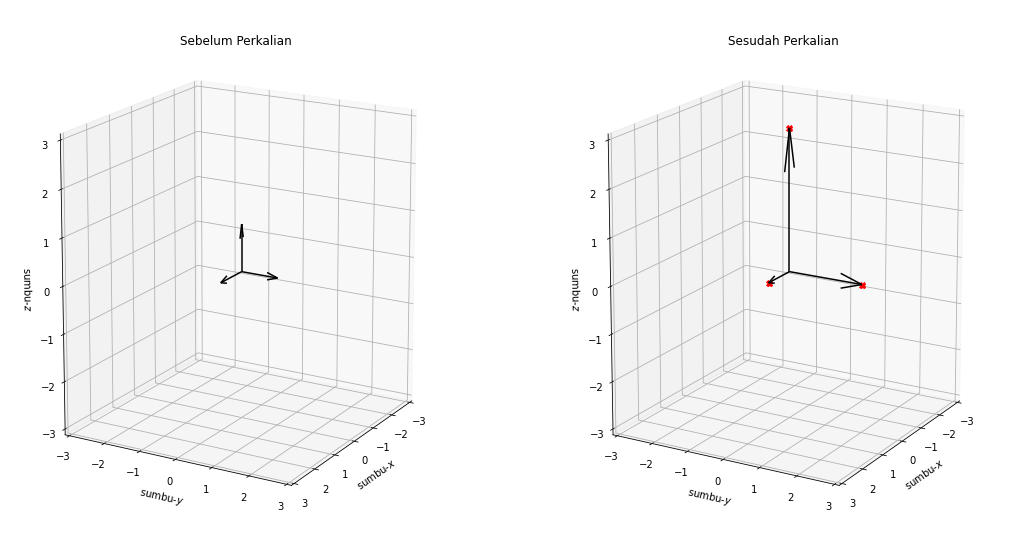

In [15]:
# plot vektor - vektor eigen
titik_awal = [0,0,0]

fig = plt.figure(figsize=(18,10))
ax1 = fig.add_subplot(121, projection='3d')

ax1.quiver(titik_awal, titik_awal, titik_awal, vektor_eigen[0, :], vektor_eigen[1, :], vektor_eigen[2, :], color = 'k')
ax1.set_xlim([-3, 3])
ax1.set_ylim([-3, 3])
ax1.set_zlim([-3, 3])
ax1.set_xlabel('sumbu-$x$')
ax1.set_ylabel('sumbu-$y$')
ax1.set_zlabel('sumbu-$z$')
ax1.view_init(15, 30)
ax1.set_title("Sebelum Perkalian")

# perkalian matriks awal dengan vektor - vektor eigen
eig_baru = np.matmul(A, vektor_eigen)
ax2 = plt.subplot(122, projection='3d')

# plot vektor - vektor baru
ax2.quiver(titik_awal, titik_awal, titik_awal, eig_baru[0, :], eig_baru[1, :], eig_baru[2, :], color = 'k')

# plot nilai - nilai eigen untuk setiap vektor 
ax2.plot((nilai_eigen[0]*vektor_eigen[0]), (nilai_eigen[1]*vektor_eigen[1]), (nilai_eigen[2]*vektor_eigen[2]), 'rX')
ax2.set_title("Sesudah Perkalian")
ax2.set_xlim([-3, 3])
ax2.set_ylim([-3, 3])
ax2.set_zlim([-3, 3])
ax2.set_xlabel('sumbu-$x$')
ax2.set_ylabel('sumbu-$y$')
ax2.set_zlabel('sumbu-$z$')
ax2.view_init(15, 30)

# tampilkan plot!
plt.show()